**The notebook contains image augmentations, and  anchor aspect ratio box calculations based on ground truth of training dataset.**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

In [ ]:
import tensorflow as tf

In [ ]:
%cd '/content/drive/MyDrive/new/TensorFlow/'
!git clone https://github.com/tensorflow/models.git

/content/drive/MyDrive/new/TensorFlow
fatal: destination path 'models' already exists and is not an empty directory.


In [ ]:
def recenter_image(image):
    # ssd preprocessing
    #image += [123.68, 116.779, 103.939]
    return image

def display_instances(image, bboxes, classes):
    image = recenter_image(image)
    w, h, _ = image.shape
    # resize the bboxes
    #bboxes[:, [0, 2]] *= w
    #bboxes[:, [1, 3]] *= h

    f, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(image.astype(np.uint8))

    for bb, cl in zip(bboxes, classes):
        y1, x1, y2, x2 = bb     
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor='r', linewidth=2)
        ax.add_patch(rec)
    plt.show()

def display_batch(batch):
    # get images, bboxes and classes
    batched_images = batch[0]['image'].numpy()
    batched_bboxes = batch[1]['groundtruth_boxes'].numpy()
    batched_classes = batch[1]['groundtruth_classes'].numpy()
    num_bboxes = batch[1]['num_groundtruth_boxes'].numpy()
    #print(batched_bboxes.shape)
    batch_size = batched_images.shape[0]
    for idx in range(batch_size):
      #print(batched_bboxes[idx, :num_bboxes[idx], :])
      display_instances(batched_images[idx, ...], batched_bboxes[idx, :num_bboxes[idx], :], batched_classes[idx, ...])


In [ ]:
%cd /content/drive/MyDrive/nd013-c1-vision-starter/
label_map_path  = '/content/drive/MyDrive/nd013-c1-vision-starter/label_map.pbtxt'
config_path ='/content/drive/MyDrive/nd013-c1-vision-starter/experiments/exp1/training/reference/exp1_pipeline.config'
saved_model_path = '/content/drive/MyDrive/nd013-c1-vision-starter/experiments/exp1/training/reference/exported_model/saved_model'

/content/drive/MyDrive/nd013-c1-vision-starter


In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from matplotlib import animation
from object_detection.builders.dataset_builder import build as build_dataset
from object_detection.utils.config_util import get_configs_from_pipeline_file
from object_detection.utils.label_map_util import create_category_index_from_labelmap
from object_detection.utils import visualization_utils as viz_utils
#from utils2 import get_module_logger

category_index = create_category_index_from_labelmap(label_map_path,use_display_name=True)


# open config file
#logger.info(f'Loading config from {config_path}')
configs = get_configs_from_pipeline_file(config_path)
eval_config = configs['eval_config']
eval_input_config = configs['eval_input_config']
model_config = configs['model']
tf_rec_path="/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/segment-10023947602400723454_1120_000_1140_000_with_camera_labels.tfrecord"
    # update the eval config file
eval_input_config.tf_record_input_reader.input_path[:] = [tf_rec_path]

    # build dataset
dataset = build_dataset(eval_input_config)

images = []
#logger.info(f'Inference on {tf_record_path}')

INFO:tensorflow:Reading unweighted datasets: ['/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/segment-10023947602400723454_1120_000_1140_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/segment-10023947602400723454_1120_000_1140_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


**Augmentation Adjsut gamma moves the histogram to right or left**
If gamma > 1, the histogram will shift towards left and the output image will be darker than the input image.

/content/drive/MyDrive/nd013-c1-vision-starter


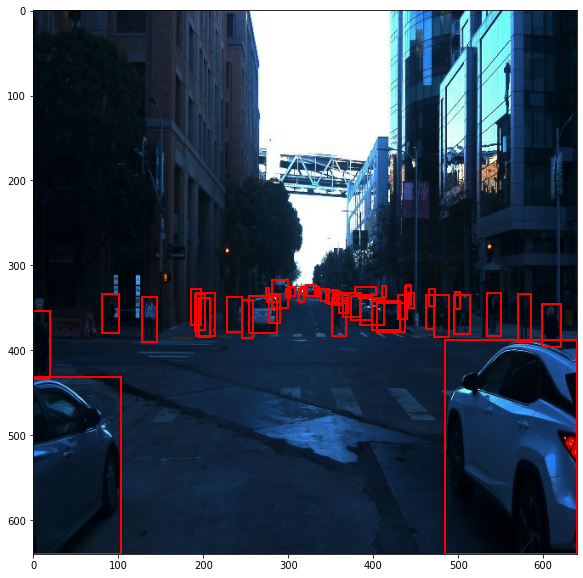

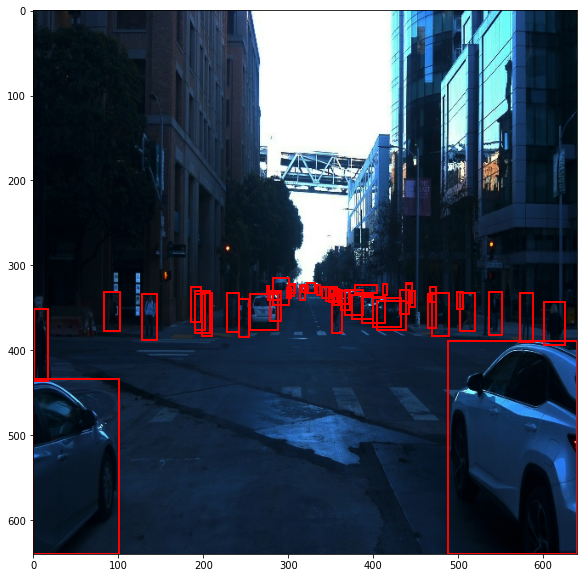

In [ ]:
%cd '/content/drive/MyDrive/nd013-c1-vision-starter'
from utils2 import *
import numpy as np
from object_detection.core import standard_fields
from object_detection.metrics import coco_evaluation
from object_detection.utils import tf_version
from pycocotools import cocoeval
%matplotlib inline

def _get_categories_list():
  return [{
      'id': 1,
      'name': 'vehicle'
  }, {
      'id': 2,
      'name': 'pedestrian'
  }, {
      'id': 3,
      'name': 'dummy'
  }, {
      'id': 4,
      'name': 'cyclist'
  }]
  
coco_evaluator = coco_evaluation.CocoDetectionEvaluator(_get_categories_list(),include_metrics_per_category=False,all_metrics_per_category=False)
for idx, batch in enumerate(dataset):
  if idx < 2:
    input_tensor = batch['image']
    input_tensor=tf.image.adjust_gamma(input_tensor, 2.0)
    image_np = input_tensor.numpy().astype(np.uint8)
    input_tensor = input_tensor[tf.newaxis, ...]
    gt_bb = batch['groundtruth_boxes'].numpy()
    gt_bb=gt_bb*640
    gt_cls = batch['groundtruth_classes'].numpy()
    display_instances(image_np,gt_bb ,gt_cls)
  elif idx > 2:
    break


**Augmentation Adjust Contrast:**
Contrast was adjusted randomly betweeb 0.2 and 0.8 in the train dataset.

/content/drive/MyDrive/nd013-c1-vision-starter


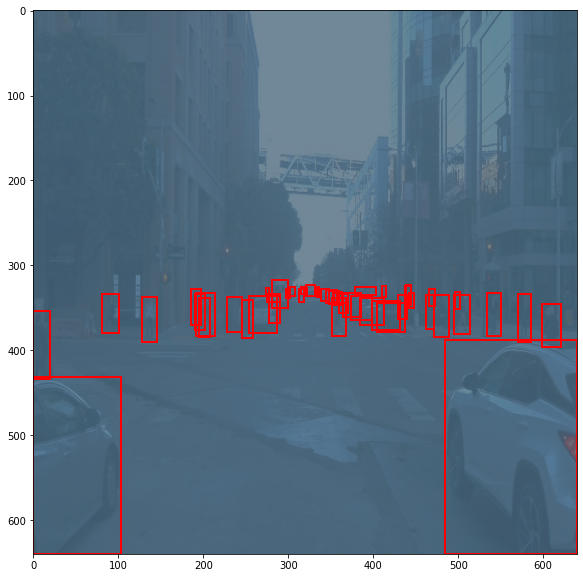

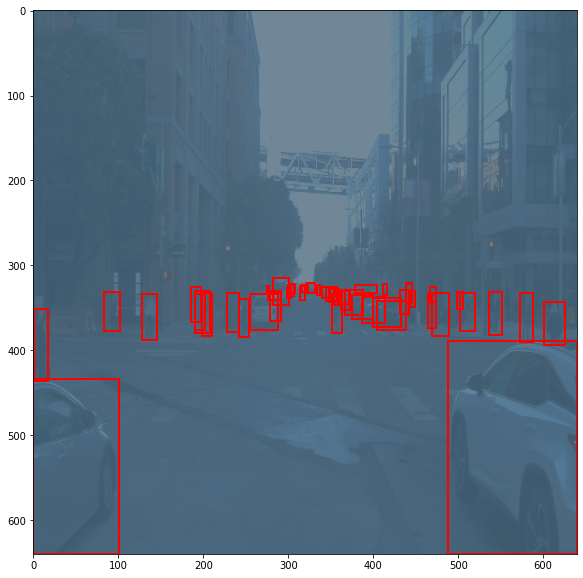

In [ ]:
%cd '/content/drive/MyDrive/nd013-c1-vision-starter'
from utils2 import *
import numpy as np
from object_detection.core import standard_fields
from object_detection.metrics import coco_evaluation
from object_detection.utils import tf_version
from pycocotools import cocoeval
%matplotlib inline

def _get_categories_list():
  return [{
      'id': 1,
      'name': 'vehicle'
  }, {
      'id': 2,
      'name': 'pedestrian'
  }, {
      'id': 3,
      'name': 'dummy'
  }, {
      'id': 4,
      'name': 'cyclist'
  }]
  
coco_evaluator = coco_evaluation.CocoDetectionEvaluator(_get_categories_list(),include_metrics_per_category=False,all_metrics_per_category=False)
for idx, batch in enumerate(dataset):
  if idx < 2:
    input_tensor = batch['image']
    input_tensor=tf.image.adjust_contrast(input_tensor, .2)
    image_np = input_tensor.numpy().astype(np.uint8)
    input_tensor = input_tensor[tf.newaxis, ...]
    gt_bb = batch['groundtruth_boxes'].numpy()
    gt_bb=gt_bb*640
    gt_cls = batch['groundtruth_classes'].numpy()
    display_instances(image_np,gt_bb ,gt_cls)
  elif idx > 2:
    break


**Augmentation Center crop**

/content/drive/MyDrive/nd013-c1-vision-starter


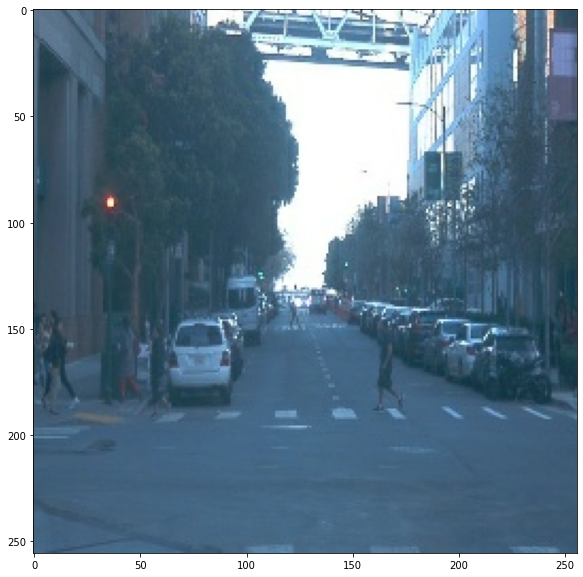

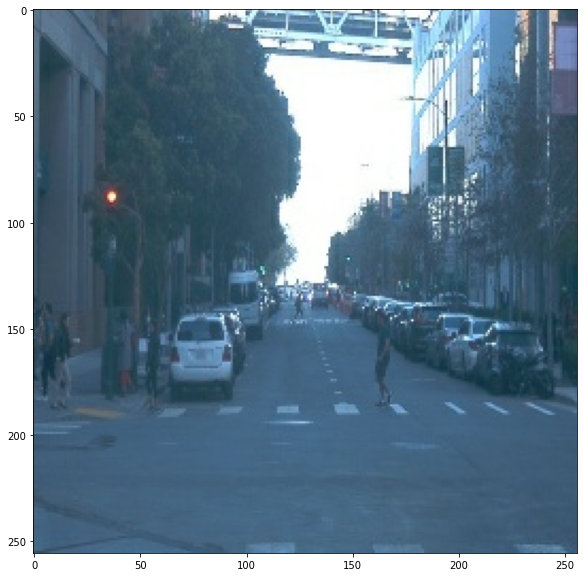

In [ ]:
%cd '/content/drive/MyDrive/nd013-c1-vision-starter'
from utils2 import *
import numpy as np
from object_detection.core import standard_fields
from object_detection.metrics import coco_evaluation
from object_detection.utils import tf_version
from pycocotools import cocoeval
%matplotlib inline

def _get_categories_list():
  return [{
      'id': 1,
      'name': 'vehicle'
  }, {
      'id': 2,
      'name': 'pedestrian'
  }, {
      'id': 3,
      'name': 'dummy'
  }, {
      'id': 4,
      'name': 'cyclist'
  }]
  
coco_evaluator = coco_evaluation.CocoDetectionEvaluator(_get_categories_list(),include_metrics_per_category=False,all_metrics_per_category=False)
for idx, batch in enumerate(dataset):
  if idx < 2:
    input_tensor = batch['image']
    input_tensor=tf.image.central_crop(input_tensor, 0.4)
    image_np = input_tensor.numpy().astype(np.uint8)
    input_tensor = input_tensor[tf.newaxis, ...]
    gt_bb = batch['groundtruth_boxes'].numpy()
    gt_bb=gt_bb*640
    gt_cls = batch['groundtruth_classes'].numpy()
    display_instances(image_np,gt_bb ,gt_cls)
  elif idx > 2:
    break


**Build Dataset**

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from matplotlib import animation
from object_detection.builders.dataset_builder import build as build_dataset
from object_detection.utils.config_util import get_configs_from_pipeline_file
from object_detection.utils.label_map_util import create_category_index_from_labelmap
from object_detection.utils import visualization_utils as viz_utils
#from utils2 import get_module_logger

category_index = create_category_index_from_labelmap(label_map_path,use_display_name=True)

# Load saved model and build the detection function
#logger.info(f'Loading model from {saved_model_path}')
detect_fn = tf.saved_model.load(saved_model_path)

# open config file
#logger.info(f'Loading config from {config_path}')
configs = get_configs_from_pipeline_file(config_path)
eval_config = configs['eval_config']
eval_input_config = configs['eval_input_config']
model_config = configs['model']
#tf_rec_path="/content/drive/MyDrive/nd013-c1-vision-starter/data_new/train/segment-10023947602400723454_1120_000_1140_000_with_camera_labels.tfrecord"
    # update the eval config file
#eval_input_config.tf_record_input_reader.input_path[:] = [tf_rec_path]

    # build dataset
dataset = build_dataset(eval_input_config)

images = []
#logger.info(f'Inference on {tf_record_path}')

INFO:tensorflow:Reading unweighted datasets: ['/content/drive/MyDrive/nd013-c1-vision-starter/data_new/eval/segment-3132521568089292927_2220_000_2240_000_with_camera_labels.tfrecord', '/content/drive/MyDrive/nd013-c1-vision-starter/data_new/eval/segment-4013698638848102906_7757_240_7777_240_with_camera_labels.tfrecord', '/content/drive/MyDrive/nd013-c1-vision-starter/data_new/eval/segment-4138614210962611770_2459_360_2479_360_with_camera_labels.tfrecord', '/content/drive/MyDrive/nd013-c1-vision-starter/data_new/eval/segment-4277109506993614243_1648_000_1668_000_with_camera_labels.tfrecord', '/content/drive/MyDrive/nd013-c1-vision-starter/data_new/eval/segment-4292360793125812833_3080_000_3100_000_with_camera_labels.tfrecord', '/content/drive/MyDrive/nd013-c1-vision-starter/data_new/eval/segment-4295449061847708198_3769_000_3789_000_with_camera_labels.tfrecord', '/content/drive/MyDrive/nd013-c1-vision-starter/data_new/eval/segment-4305539677513798673_2200_000_2220_000_with_camera_labels

In [ ]:
%cd '/content/drive/MyDrive/nd013-c1-vision-starter'
from utils2 import *
import numpy as np
from object_detection.core import standard_fields
from object_detection.metrics import coco_evaluation
from object_detection.utils import tf_version
from pycocotools import cocoeval

def _get_categories_list():
  return [{
      'id': 1,
      'name': 'vehicle'
  }, {
      'id': 2,
      'name': 'pedestrian'
  }, {
      'id': 3,
      'name': 'dummy'
  }, {
      'id': 4,
      'name': 'cyclist'
  }]
  
coco_evaluator = coco_evaluation.CocoDetectionEvaluator(_get_categories_list(),include_metrics_per_category=False,all_metrics_per_category=False)
for idx, batch in enumerate(dataset):
  input_tensor = batch['image']
  image_np = input_tensor.numpy().astype(np.uint8)
  input_tensor = input_tensor[tf.newaxis, ...]
  detections_batch = detect_fn(input_tensor)
  gt_bb = batch['groundtruth_boxes'].numpy()
  gt_bb=gt_bb*640
  gt_cls = batch['groundtruth_classes'].numpy()
  coco_evaluator.add_single_ground_truth_image_info(
      image_id=str(idx),
      groundtruth_dict={
          standard_fields.InputDataFields.groundtruth_boxes:
          gt_bb,
          standard_fields.InputDataFields.groundtruth_classes: gt_cls
      })
  num_det = detections_batch['detection_boxes'].numpy().shape[1]
  dt_bb = np.reshape(detections_batch['detection_boxes'].numpy(),(num_det,4))
  dt_bb=dt_bb*640
  dt_bb_cls = np.reshape(detections_batch['detection_classes'].numpy(),num_det)
  dt_bb_scores = np.reshape(detections_batch['detection_scores'].numpy(),(num_det))
  coco_evaluator.add_single_detected_image_info(
      image_id=str(idx),
      detections_dict={
          standard_fields.DetectionResultFields.detection_boxes:
          dt_bb,
          standard_fields.DetectionResultFields.detection_scores:
          dt_bb_scores,
          standard_fields.DetectionResultFields.detection_classes:
          dt_bb_cls
      })

/content/drive/MyDrive/nd013-c1-vision-starter


**Anchor box aspect ratio calculation from ground truth of train dataset**

In [ ]:
from object_detection.core import standard_fields
from object_detection.metrics import coco_evaluation
from object_detection.utils import tf_version
#from pycocotools import cocoeval
def _get_categories_list():
  return [{
      'id': 1,
      'name': 'vehicle'
  }, {
      'id': 2,
      'name': 'pedestrian'
  }, {
      'id': 3,
      'name': 'dummy'
  }, {
      'id': 4,
      'name': 'cyclist'
  }]

coco_evaluator = coco_evaluation.CocoDetectionEvaluator(_get_categories_list(),include_metrics_per_category=True,all_metrics_per_category=True)
a_ratios_i = []
a_ratios_m = []
a_ratios_l = []
l_sum=0
w_sum=0
cars=0
peds=0
bcyc=0
for idx, batch in enumerate(dataset):
  #print("Index:",idx)
  #print("\n")
  input_tensor = batch['image']
  image_np = input_tensor.numpy().astype(np.uint8)
  input_tensor = input_tensor[tf.newaxis, ...]
  #detections_batch = detect_fn(input_tensor)
  #gt_bb = example['groundtruth_boxes'].numpy()
  gt_bb = batch['groundtruth_boxes'].numpy()
  gt_bb_cal = gt_bb*640
  l = gt_bb_cal[:,2] - gt_bb_cal[:,0]
  
  l_sum+=l.shape[0]
  #print("\n")
  #print("not small length",l[l[:]>128].shape[0])
  w = gt_bb_cal[:,3] - gt_bb_cal[:,1]
  p=l*w

  s_i=p<32*32
  s_l=p>96*96
  s_m=~(s_i+s_l)

  w_sum+=w.shape[0]

  a_i=w[s_i]/l[s_i]
  a_m=w[s_m]/l[s_m]
  a_l=w[s_l]/l[s_l]
  a_ratios_i=np.concatenate((a_ratios_i,a_i),axis=0)
  a_ratios_m=np.concatenate((a_ratios_m,a_m),axis=0)
  a_ratios_l=np.concatenate((a_ratios_l,a_l),axis=0)

  gt_cls = batch['groundtruth_classes'].numpy()
  cars+=gt_cls[gt_cls[:]==1].shape[0]
  peds+=gt_cls[gt_cls[:]==2].shape[0]
  bcyc+=gt_cls[gt_cls[:]==4].shape[0]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Anchor box Aspect ratio calculation using k means clustering**

In [ ]:
from sklearn.cluster import KMeans
def get_centers(a_ratios,n_clusters):
  a=a_ratios.reshape(-1, 1)
  kmeans = KMeans(n_clusters=n_clusters)
  kmeans.fit(a)
  y_kmeans = kmeans.predict(a)
  return kmeans.cluster_centers_

In [ ]:
%matplotlib inline
def plot_elbow(a_ratios):
  from sklearn.cluster import KMeans
  a=a_ratios.reshape(-1, 1)
  # step 1
  sse = {} 
  for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000, random_state = 1).fit(a)
    sse[k] = kmeans.inertia_     # Use inertia attribute from the clustering object and store the inertia value for that K

    # step 3
  plt.figure()

  plt.plot(list(sse.keys()), list(sse.values()), 'bx-')

  plt.xlabel("Number of cluster")

  plt.ylabel("SSE")

  plt.show()

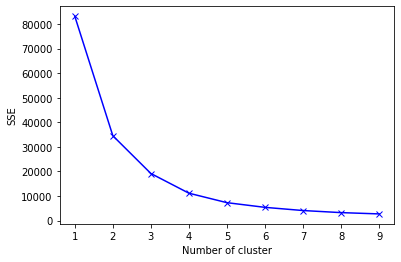

In [ ]:
plot_elbow(a_ratios_i)

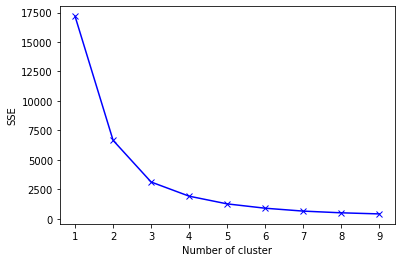

In [ ]:
plot_elbow(a_ratios_ml)

In [ ]:
a_ratios_i.shape

(257079,)

In [ ]:
a_ratios_m.shape

(59503,)

In [ ]:
a_ratios_l.shape

(13956,)

In [ ]:
get_centers(a_ratios_i,3)

array([[0.36747105],
       [2.10131595],
       [0.92024343]])

In [ ]:
get_centers(a_ratios_i,4)

array([[0.86450212],
       [1.70103675],
       [3.30941172],
       [0.35459628]])

In [ ]:
get_centers(a_ratios_ml,3)

array([[0.93661584],
       [0.38132204],
       [1.79299923]])

In [ ]:
#train
get_centers(a_ratios_m)

array([[0.88732866],
       [1.44182089],
       [0.34088771],
       [2.15626156]])

In [ ]:
get_centers(a_ratios_l)

array([[1.86339153],
       [0.7869377 ],
       [0.39347244],
       [1.0701325 ]])

In [ ]:
#train
get_centers(a_ratios_i,4)

array([[0.86519479],
       [3.29834066],
       [0.35524503],
       [1.70019481]])

In [ ]:
a_ratios_ml=np.concatenate((a_ratios_l,a_ratios_m),axis=0)

In [ ]:
get_centers(a_ratios_l)

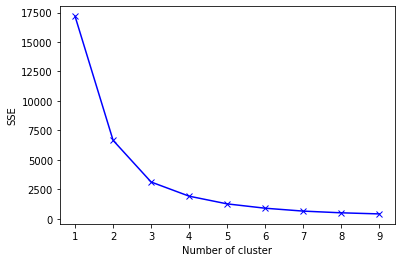

In [ ]:
from sklearn.cluster import KMeans
a=a_ratios_ml.reshape(-1, 1)
# step 1
sse = {} 
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000, random_state = 1).fit(a)
    sse[k] = kmeans.inertia_     # Use inertia attribute from the clustering object and store the inertia value for that K

# step 3
plt.figure()

plt.plot(list(sse.keys()), list(sse.values()), 'bx-')

plt.xlabel("Number of cluster")

plt.ylabel("SSE")

plt.show()

In [ ]:
get_centers(a_ratios_l)

array([[0.92576796],
       [1.82724868],
       [0.47883962]])